In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature scaling is not necessary since Naive Bayes doesnt depend on distance.

In [7]:
from sklearn.naive_bayes import GaussianNB # GaussianNB is a simple one, there are others like bernouli
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [8]:
nb.predict([[30, 87000]])

array([0])

In [9]:
y_pred = nb.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[50,  2],
       [ 4, 24]])

In [11]:
accuracy_score(y_test, y_pred)

0.925

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_91873/2385045337.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)


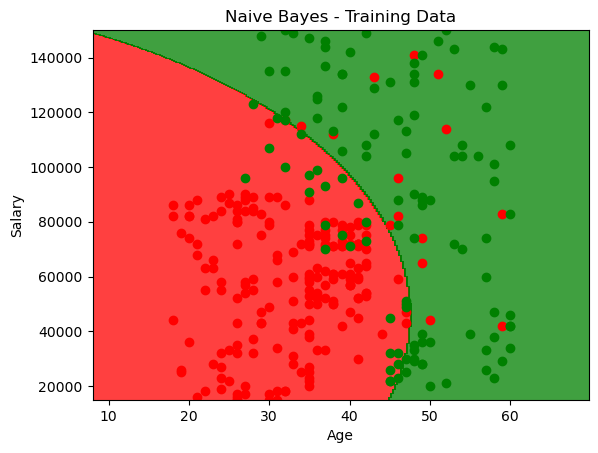

In [13]:
# Predicting train set
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:, 0].max() + 10,step = 0.25), 
                     np.arange(start = X_set[:,1].min() - 10, stop = X_set[:, 1].max() + 10,step = 0.25))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
             , alpha = 0.75, cmap = ListedColormap(['r','g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)

plt.title("Naive Bayes - Training Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend
plt.show()

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_91873/3047781809.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)


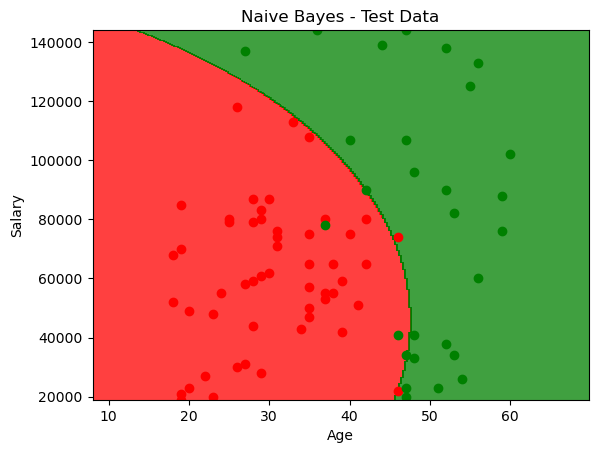

In [14]:
# Predicting train set
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:, 0].max() + 10,step = 0.25), 
                     np.arange(start = X_set[:,1].min() - 10, stop = X_set[:, 1].max() + 10,step = 0.25))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
             , alpha = 0.75, cmap = ListedColormap(['r','g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)

plt.title("Naive Bayes - Test Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend
plt.show()